This dataset contains information of users from a companies database. It contains information about UserID, Gender, Age, EstimatedSalary, Purchased. We are using this dataset for predicting that a user will purchase the company’s newly launched product or not.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
dataset = pd.read_csv("User_Data.csv")
dataset.shape


(400, 5)

In [18]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Now, to predict whether a user will purchase the product or not, one needs to find out the relationship between Age and Estimated Salary. Here User ID and Gender may not important factors for finding out this.

In [19]:
# input # Remove user id as there is no role of user id in making purchase decision
x = dataset.iloc[:, [2, 3]].values
  
# output @ Purchase colum , 2 class 0 and 1 
y = dataset.iloc[:, 4].values
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25) # 25 % for testing , rest for training

In [21]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() # to normalize data ( all columns ) ,mean = 0 , variance = 1
xtrain = sc_x.fit_transform(xtrain) # fit finds mean and SD, followed by transform = ( x - mean ) / SD
xtest = sc_x.transform(xtest)
  
print (xtrain[0:10, :])

[[-1.26894311 -1.45339826]
 [ 1.11389948  0.48613866]
 [-1.84082533 -0.03493096]
 [ 0.06544874  0.05191397]
 [ 0.25607615  0.08086229]
 [ 1.30452689  2.22303738]
 [ 0.35138985  0.08086229]
 [ 1.4951543   0.37034541]
 [ 0.35138985 -1.13496682]
 [-0.88768829  0.42824203]]


In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=200) # by default threshold = 0.5
classifier.fit(xtrain, ytrain) # loss function is auto calculated and hyper params are tuned

LogisticRegression(max_iter=200)

In [23]:

y_pred = classifier.predict(xtest)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[56  7]
 [11 26]]


In [25]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.82


/var/folders/hx/nlxlcqm94yq9x1k828s8452h0000gp/T/ipykernel_85569/4167793186.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


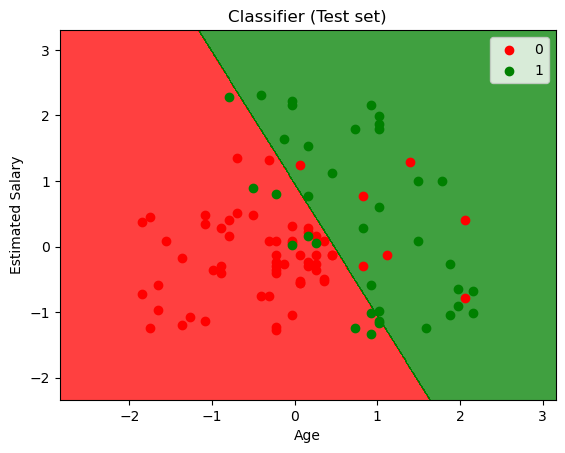

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
      
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()